In [1]:
"""
Briar Doty
AMATH 584 - HW2
10/15/20
Full repository available at https://github.com/briardoty/amath584
"""

%matplotlib inline

from svd_faces import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [2]:
# 1 - svd analysis of images

# load cropped images
faces_arr, x, y = load_faces(cropped=True)

# perform svd decomposition
u, s, vh = linalg.svd(faces_arr, full_matrices=False)

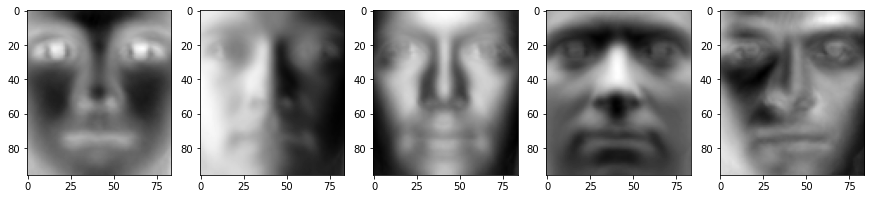

In [3]:
# 2 - interpretation
"""
U: The columns of U represent the different SVD modes present in the face dataset.
S: The values of S represent the contributions of the corresponding columns of U to variance in the face dataset.
V: V tells us how each image in the dataset projects onto each of the SVD modes. So we can use it to reconstruct 
   the images in our dataset (in conjunction with U).
"""

display_top_modes(u, x, y, few=5)

The first 1 mode accounts for 11.658008575439453% of variance.
The first 10 modes account for 26.564293324947357% of variance.
The first 20 modes account for 32.36464339494705% of variance.
The first 30 modes account for 36.606966465711594% of variance.
The first 40 modes account for 40.046732515096664% of variance.
The first 50 modes account for 42.933979988098145% of variance.
The first 60 modes account for 45.42266756296158% of variance.
The first 70 modes account for 47.63717180490494% of variance.
The first 80 modes account for 49.62548308074474% of variance.
The first 90 modes account for 51.43825976550579% of variance.
The first 100 modes account for 53.10056072473526% of variance.


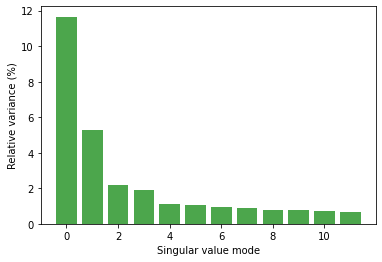

In [4]:
# 3i - SVD spectrum
"""
The answer to how many modes are necessary for a good reconstruction depends on how we define "good." If good means
25% reconstruction, then the first 8 modes are necessary. If good means 50%, we need 82. We will see how good these
actually look in the next section.
"""

summarize_svd_spectrum(s, bins=12, modes=101)

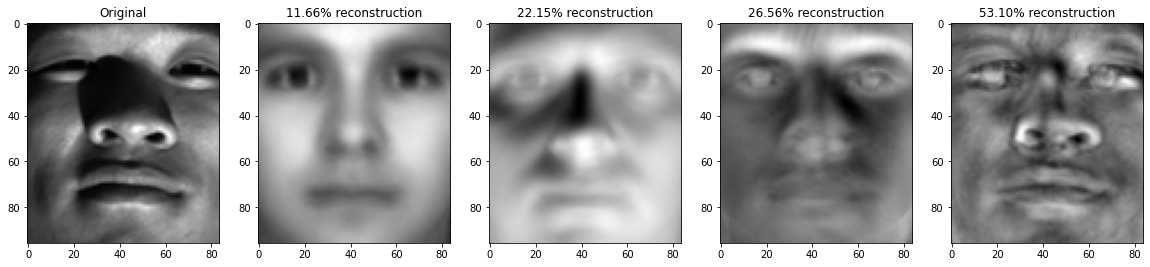

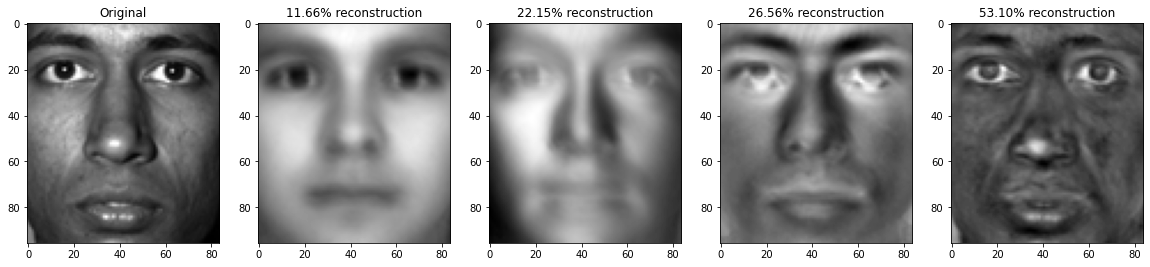

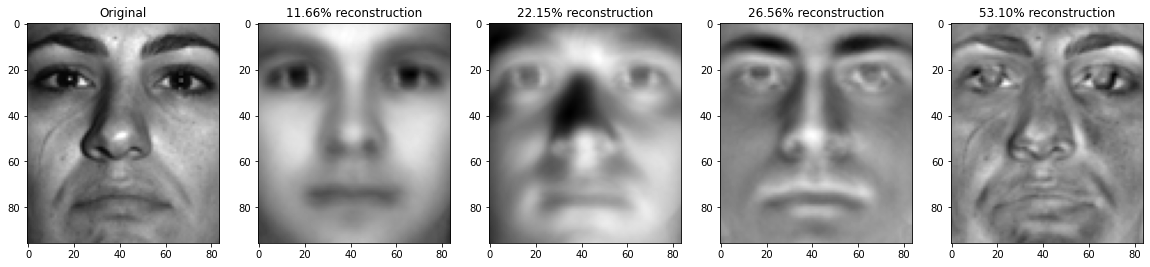

In [5]:
# 3ii - reconstructions
"""
Reconstructions using a different number of SVD modes for 3 different images. Based on these reconstructions, I
think we need about 50% of the variance accounted for to make a "good" reconstruction of an image in this dataset.
This takes around 82 modes. Surprisingly, this is enough to reconstruct the scar on the woman's face in the last 
image below.
"""

img_idxs = [24, 200, 503]     # image indices to reconstruct
modes_arr = [1, 5, 10, 100]   # n modes to use in reconstruction

reconstruct(u, s, vh, faces_arr, x, y, img_idxs, modes_arr)

The first 1 mode accounts for 30.008440017700195% of variance.
The first 10 modes account for 52.78162956237793% of variance.
The first 20 modes account for 62.68323105573654% of variance.
The first 30 modes account for 69.2745007276535% of variance.
The first 40 modes account for 74.19369918107986% of variance.
The first 50 modes account for 78.19220170378685% of variance.
The first 60 modes account for 81.65239581465721% of variance.
The first 70 modes account for 84.6858326792717% of variance.
The first 80 modes account for 87.37348088622093% of variance.
The first 90 modes account for 89.76619726419449% of variance.
The first 100 modes account for 91.92283250391483% of variance.


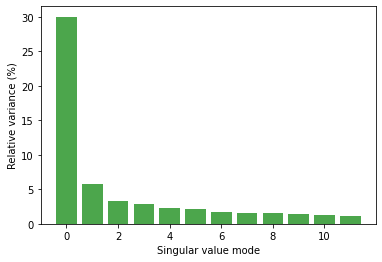

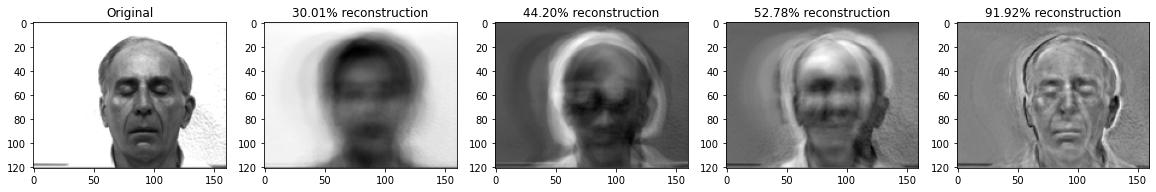

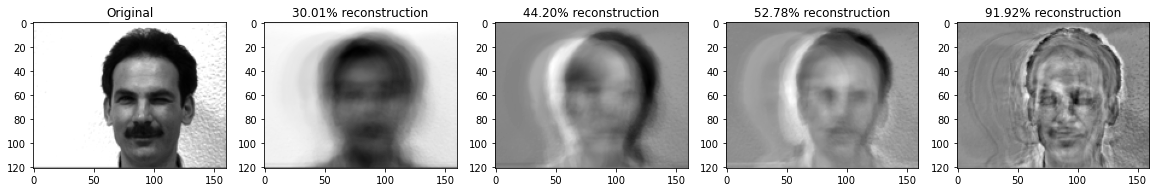

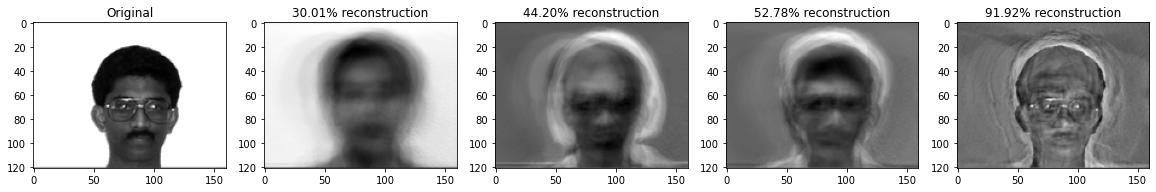

In [4]:
# 4 - uncropped dataset
"""
As you can see, the first few modes in this dataset account for significantly more variance than in the cropped
dataset. Presumably this is because there is more spatial variance in the uncropped images, and the subject's 
head can be located in different places. This results in a steeper singular value decay, but also appears to 
result in poorer reconstruction of facial features, because now the dominant modes are working to locate the 
subjects' heads in the frame, as opposed to encode facial details. It appears to have a particularly difficult
time reconstructing moustaches.
"""

# load uncropped images
faces_arr, x, y = load_faces(cropped=False)

# perform svd decomposition
u, s, vh = linalg.svd(faces_arr, full_matrices=False)

# look at sv spectrum
summarize_svd_spectrum(s, bins=12, modes=101)

# try reconstructing some images
img_idxs = [1, 24, 30]     # image indices to reconstruct
modes_arr = [1, 5, 10, 100]   # n modes to use in reconstruction
reconstruct(u, s, vh, faces_arr, x, y, img_idxs, modes_arr)